In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB
import re
import matplotlib.pyplot as plt

In [3]:
def removeLinks(line):
    newLine = re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"," ",line)
    return newLine

In [4]:
def tokenize(fn):
    tokens = []
    fn  = removeLinks(fn)
    words = re.split('[^a-z0-9]+', fn.lower())
    for word in words:
        if len(word) > 2:
            tokens.append(word)
    return tokens

In [5]:
def getStringArrayFromNumpyDataFrame(dataframe):
    list=[]
    for s in dataframe.values:
        if len(str(s[0]))>0:
            list.append(str(s[0]))
    return list

In [6]:
def getEmotions(text,clf):

    text = tokenize(text)
    X_new_counts = count_vect.transform(text)
    #print("New COUNTS: ",X_new_counts)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted = clf.predict(X_new_tfidf)
    #print("PREDICTED: ",predicted)

    positive_count = 0
    for x in predicted:
        if x==1:
            positive_count=positive_count+1
    return positive_count;

In [7]:
def getEmotionFromText(text):
    positives=getEmotions(text,clf_positive)
    negatives=getEmotions(text,clf_negative)
    bad=getEmotions(text,clf_bad)

   # print(positives, negatives, bad)

    if(bad>0):
        return("Bad tweet ->%s"%(text),0,0,1,0)
    else:
        if(positives-negatives)>0:
            return("Positive tweet ->%s"%(text),1,0,0,0)
        elif(negatives-positives)>0:
            return("Negative tweet ->%s"%(text),0,1,0,0)
        else:
            return("Neutral tweet ->%s"%(text),0,0,0,1)

In [33]:
train_data_csv_name="C:/Users/anoel/Documents/Year 3 Quarter 2/CS 178/Final Project/178 Stuff/"

data_list = ["1000P1000N.txt","2000P1000N.txt","2000P2000N.txt","All Words Formatted.txt",]
positive_count=[]
negative_count=[]
Bad_count=[]
ne_count= []
for file_name in data_list:
    print("NEW FILE: ",file_name)
    df_x_words = np.genfromtxt(train_data_csv_name+file_name, delimiter=',', usecols=(0), dtype=str)
    df_y_positive= np.genfromtxt(train_data_csv_name+file_name, delimiter=',', usecols=(1))
    df_y_negative= np.genfromtxt(train_data_csv_name+file_name, delimiter=',', usecols=(2))
    df_y_bad = np.genfromtxt(train_data_csv_name+file_name, delimiter=',', usecols=(3))

    #print(df_x_words)
    pCount = 0
    nCount = 0
    bCount = 0
    neCount = 0
    
    
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(df_x_words)
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    
    clf_positive = MultinomialNB().fit(X_train_tfidf, df_y_positive)
    clf_negative = MultinomialNB().fit(X_train_tfidf, df_y_negative)
    clf_bad = MultinomialNB().fit(X_train_tfidf, df_y_bad)


    outputfile = open("C:/Users/anoel/Documents/Year 3 Quarter 2/CS 178/Final Project/178 Stuff/SentimentAnalysis.txt",'w')
    tweet_file_name="C:/Users/anoel/Documents/Year 3 Quarter 2/CS 178/Final Project/178 Stuff/tweets_UCI_70tweets.txt"
    with open(tweet_file_name, encoding='latin-1') as f:
        for line in f:
            tmpstr,p,n,b,ne = getEmotionFromText(line)
            pCount+=p
            nCount+=n
            bCount+=b
            neCount+=ne
            #print(tmpstr)
            #outputfile.write(tmpstr)

        
    outputfile.close()
    print("\n\n\n NEW ITERATION\n\n\n")
    positive_count.append(pCount)
    negative_count.append(nCount)
    Bad_count.append(bCount)
    ne_count.append(neCount)

print(positive_count)
print(negative_count)
print(Bad_count)
print(ne_count)


NEW FILE:  1000P1000N.txt



 NEW ITERATION



NEW FILE:  2000P1000N.txt



 NEW ITERATION



NEW FILE:  2000P2000N.txt



 NEW ITERATION



NEW FILE:  All Words Formatted.txt



 NEW ITERATION



[48, 70, 0, 0]
[4, 0, 70, 70]
[0, 0, 0, 0]
[18, 0, 0, 0]


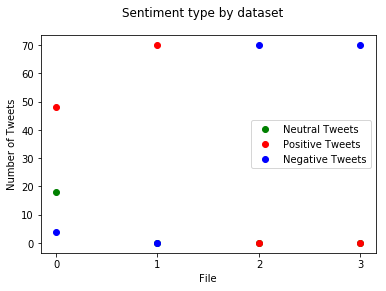

In [95]:
y=[0,1,2,3]
plt.plot(ne_count,"go", label = "Neutral Tweets")
plt.plot(positive_count,"ro",label = "Positive Tweets")
plt.plot(negative_count,"bo", label ="Negative Tweets")
plt.suptitle("Sentiment type by dataset")
plt.ylabel("Number of Tweets")
plt.xlabel("File")
plt.xticks(np.arange(min(y),max(y)+1,1.0))
plt.legend()

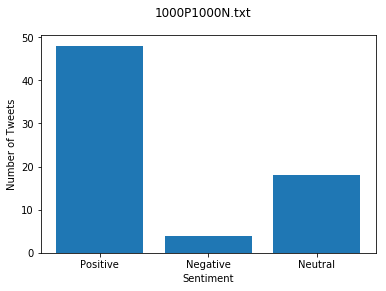

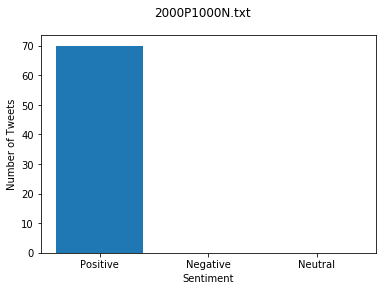

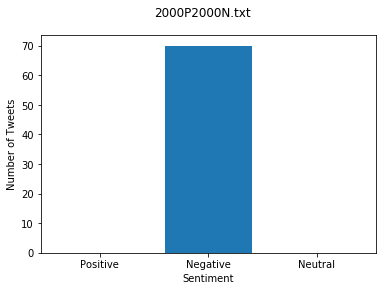

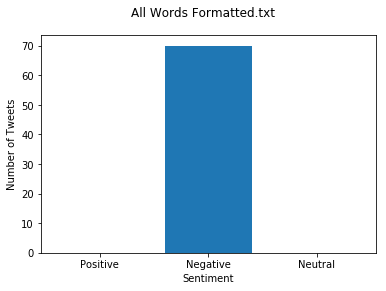

In [91]:
y = [0,1,2,3]
n = np.arange(1,4)
graph= []
for i in y:
    graph=[positive_count[i],negative_count[i],ne_count[i]]
    plt.figure(i)
    plt.bar(n,graph)
    plt.xticks(n,("Positive", "Negative", "Neutral"))
    plt.suptitle(data_list[i])
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Tweets")
    plt.show()
    